<a href="https://colab.research.google.com/github/mashrukh-zaman/BanglaNet/blob/main/BanglaNet_AlexNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import cv2
from pathlib import Path
import tensorflow as tf
import matplotlib.pyplot as plt
import datetime, os

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import VGG19
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.layers import Dense, Input, Conv2D, Flatten, MaxPool2D, Activation,BatchNormalization,MaxPooling2D,Dropout
from tensorflow.keras.optimizers import Adam

Wait for 8 seconds...
TensorBoard link:
http://4f8eb0efe572.ngrok.io


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_root = Path('/content/drive/My Drive/Desi imagenet')
print('data_root:', data_root)

data_root: /content/drive/My Drive/Desi imagenet


In [ ]:
Dim = 256
batch_size = 20
Num_class = 13

train_steps_per_epoch = 1499 // batch_size
val_steps_per_epoch = 366 // batch_size
test_steps_per_epoch = 198 // batch_size

In [ ]:
datagen=ImageDataGenerator(rescale = 1./255, validation_split = 0.2)

train_gen = datagen.flow_from_directory(data_root/'Train', target_size = (Dim, Dim),batch_size = 10, subset = 'training')
val_gen = datagen.flow_from_directory(data_root/'Train', target_size = (Dim, Dim), batch_size = 10, subset = 'validation')

Found 1420 images belonging to 13 classes.
Found 349 images belonging to 13 classes.


[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


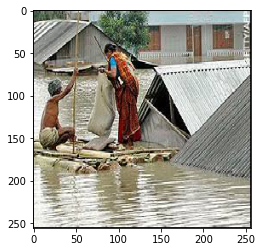

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


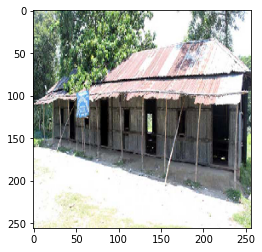

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


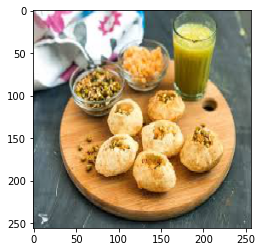

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


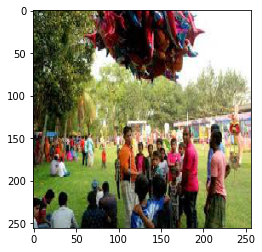

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


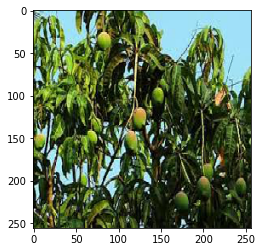

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


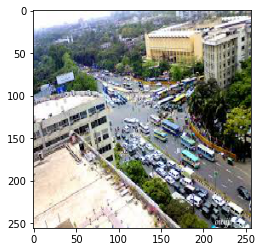

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


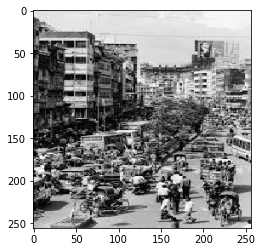

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


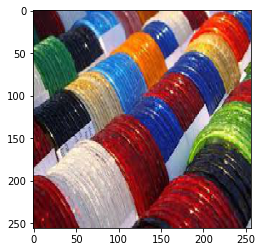

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


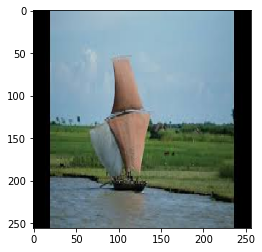

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


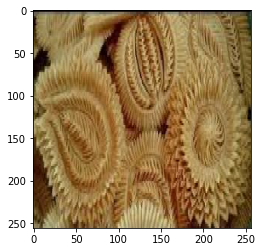

In [ ]:
x_batch,y_batch = next(train_gen)
for i in range (0,10):   
  image = x_batch[i]  
  plt.imshow(image, cmap = 'gray')
  print(y_batch[i])
  plt.show()

In [ ]:
np.random.seed(1000)

In [ ]:
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(Dim,Dim,3), kernel_size=(11,11), strides=(4,4), padding='valid'))
model.add(Activation('relu'))
# Pooling 
model. add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation before passing it to the next layer
model.add(BatchNormalization())

# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Pooling
model. add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())

# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())

# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())

# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())

# Passing it to a dense layer
model. add(Flatten())
# 1st Dense Layer
model.add(Dense(4096, input_shape=(224*224*3,)))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model. add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# 2nd Dense Layer
model.add(Dense(4096))
model.add(Activation('relu'))
# Add Dropout
model. add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# 3rd Dense Layer
model.add(Dense(1000))
model.add(Activation('relu'))
# Add Dropout
model. add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# Output Layer
model.add(Dense(64, kernel_regularizer = l2(0.001), activation = 'sigmoid'))
model.add(Dropout(0.25))
model.add(Dense(64, kernel_regularizer = l2(0.001),activation = 'sigmoid'))
model.add(Dropout(0.25))
model.add(Dense(Num_class, activation = 'softmax'))

print('Finished Loading Model.')

Finished Loading Model.


In [ ]:
model.compile(optimizer = Adam(lr=3e-4),loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 96)        34944     
_________________________________________________________________
activation (Activation)      (None, 62, 62, 96)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 96)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 31, 31, 96)        384       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 21, 21, 256)       2973952   
_________________________________________________________________
activation_1 (Activation)    (None, 21, 21, 256)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 256)       0

In [ ]:
cb_early_stopper = EarlyStopping(monitor = 'val_loss',patience = 10)

cb_checkpointer=ModelCheckpoint(filepath='/content/drive/My Drive/Desi imagenet/AlexNet.hdf5',
                               monitor = 'val_loss',
                               save_best_only = True,
                               mode = 'auto')

reducelr=ReduceLROnPlateau(monitor = 'val_loss', 
                           factor = 0.2, 
                           patience = 5, 
                           min_lr = 5e-4)

fit_history=model.fit(train_gen,steps_per_epoch = train_steps_per_epoch,
                                epochs = 50, validation_data=val_gen,
                                validation_steps = val_steps_per_epoch,
                                callbacks  =[cb_checkpointer, cb_early_stopper,reducelr])

SyntaxError: ignored